# Rapport de projet TPE: Regression logistique en grande dimension

## I - Introduction

La regression logistique est un modèle pour la classification binaire. Etant donné des observations $(x_i, y_i)$ pour $i = 1,..., n$ où $x_i \in \mathbb{R}^d$ et $y_i \in {−1, 1}$, on veut apprendre à prédire le label binaire $y_i$ à partir des features $x_i$. Les observations sont supposees i.i.d.  

Le but de ce projet est de coder un algorithme d’optimisation particulierement adapté à l’entraînement de la regression logistique en grande dimension (c’est-à-dire avec beaucoup de variables).

## II - La regression logistique

La régression logistique pose un modèle sur la loi conditionnelle de $y_i$ | $x_i$ : en effet, en supposant que

$$
P(Y = y_i \mid X = x_i) = \sigma(x_i^\top w +b)
$$

où $w \in \mathbb{R}^{d}$ est un vecteur de coefficients du modèle, $b \in \mathbb{R}$ est un coefficient appelé intercept, et où $\sigma(z)$ est la fonction de répartition "sigmoide" donnée par

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

où $z \in \mathbb{R}$


On va montrer que la moins log-vraisemblance conditionnelle $y_i$ | $x_i$ s’ecrit, à des constantes indépendantes de $w$ et $b$ pres, comme

$$
f(w, b) = \frac 1n \sum_{i=1}^n l(y_i, x_i^\top w +b)
$$

où $l(y,y') = \log(1 + \exp(-y_i x_i^\top w))$  est la **perte logistique**. Ou utilisera le fait que $y_i \in$ {−1, 1} et que
$\sigma(−z) = 1 − \sigma(z)$.
#### La vraisemblance s'écrit :

$$
L(w,b) = \prod_{i=1}^n P(Y = y_i \mid X = x_i) 
$$

$$
= \prod_{i=1}^n \sigma(x_i^\top w +b)^{\frac{1+y_i}{2}} (1-\sigma(x_i^\top w +b))^{\frac{1-y_i}{2}}
$$

$$
= \prod_{i=1}^n \sigma(x_i^\top w +b)^{\frac{1+y_i}{2}} \sigma(-(x_i^\top w +b))^{\frac{1-y_i}{2}}
$$
car $\sigma(-z) = 1 - \sigma(z)$

Et la **moins log-vraisemblance** s'écrit:

$$
-\log(L(w,b)) = -\log(\prod_{i=1}^n \sigma(x_i^\top w +b)^{\frac{1+y_i}{2}} \sigma(-(x_i^\top w +b))^{\frac{1-y_i}{2}})
$$

$$
 = -\sum_{i=1}^n \log(\sigma(x_i^\top w +b)^{\frac{1+y_i}{2}}) + \log(\sigma(-(x_i^\top w +b))^{\frac{1-y_i}{2}})
$$

$$
 = -\sum_{i=1}^n \frac{1+y_i}{2} \log(\frac{1}{1+e^{-(x_i^\top w +b))}})+ \frac{1-y_i}{2} \log(\frac{1}{1+e^{(x_i^\top w +b)}})
$$

$$
 = \sum_{i=1}^n \frac{1+y_i}{2} \log(1+e^{-(x_i^\top w +b))})+ \frac{1-y_i}{2} \log(1+e^{(x_i^\top w +b)})
$$

$$
= \sum_{i=1}^n \log(1+e^{-y_i (x_i^\top w+b)})
$$

## III - Simulation des données

On simule des $(x_i, y_i)$ selon ce modèle en dimension 2:

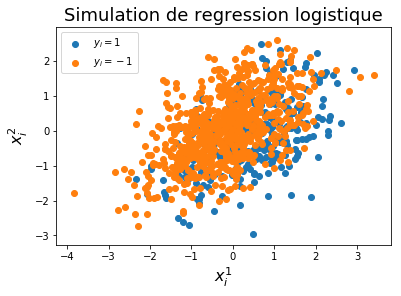

## IV - Calcul des gradients

On va maintenant s'intéresser a l'implémentation à l'algorithme de descente de gradient par coordonées, pour ce faire, on calcule la dérivée premiere et seconde de la fonction moyenne des pertes logistiques $f(w)$. 

Pour simplifier les notations, on va noter à partir de maintenant $f(w) = f(w,b)$, où $w$ est un vecteur de taille $d+1$ qui contiendra les coefficients $w \in \mathbb{R}^d$ et l'intercept $b \in \mathbb{R}$.

La dérivé premiere de $f(w)$ par rapport à $w_j$ : pour $j = 1,...,d+1$

$$
\frac{\partial f(w)}{\partial w_j} = \frac 1n \sum_{i=1}^n \frac{-y_i x_i^j e^{-y_i x_i\top w_j}}{1+e^{-y_i x_i\top w_j}}
$$

$$
= \frac 1n \sum_{i=1}^n y_i x_i^j (\frac{-e^{-y_i x_i^\top w_j}}{1+e^{-y_i x_i^\top w_j}})
$$

$$
= \frac 1n \sum_{i=1}^n y_i x_i^j (1 - \frac{1}{1+e^{-y_i x_i^\top w_j}})
$$


$$
= \frac 1n \sum_{i=1}^n y_i x_i^j (1 - \sigma(y_i x_i^\top w_j))
$$

## V - Descente de gradient par coordonnée 

La descente de gradient par coordonnée propose de faire la chose suivante:

- à chaque itération, on choisit une permutation de {$1,...,d+1$} notée $j_{p(1)},...,j_{p(d+1)}$
- on boucle sur $j_{p(1)},...,j_{p(d+1)}$, et on fait une descente de gradient pour la coordonnée uniquement:

$$
w_j = w_j - \eta_j \frac{\partial f}{\partial w_j}(w)
$$

Sachant que le pas $\eta_j > 0$ doit correspond à une borne supérieure pour la dérivée seconde par rapport à $w_j$, alors on veut montrer que

$$
\frac{\partial f^2(w)}{\partial w_j^2} \leq \frac{\|x^j\|_2^2}{4n}
$$

La dérivé seconde de $f(w)$ par rapport à $w_j$ :

$$
\frac{\partial f^2(w)}{\partial w_j^2} = \frac 1n \sum_{i=1}^n y_i x_i^j y_i x_i^j \sigma(y_i x_i^\top w_j) (1-\sigma(y_i x_i^\top w_j))
$$

$$
\leq \frac{1}{4n} \sum_{i=1}^n (y_i x_i^j)^2 \leq \frac{1}{4n} \sum_{i=1}^n \lvert x_i^j \rvert^2 =\frac{\|x^j\|_2^2}{4n}
$$

Le pas $\eta_j$ est donc égale à $\frac{\|x^j\|_2^2}{4n}$. 

On applique l'algorithme et voici la représentation graphique ci-dessous:

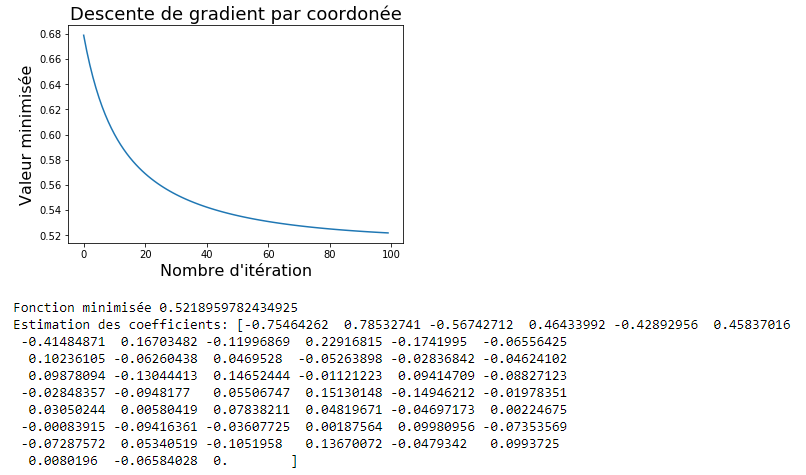

## VI - Descente de gradient par coordonnées pour la régression logistique pénalisée

En grande dimension, on cherche à diminuer le nombre de variable à prendre en compte, et pour cela on va utiliser une technique de pénalisation $l_1$: Lasso. On veut utiliser Lasso car on ne veut pas que l'attache aux donneés soient trop importantes: overfitting. Dans ce cas là, on minimise la fonction
$$
\frac 1n \sum_{i=1}^n l(y_i, x_i^\top w +b) + \lambda \|w\|_1
$$

où $\lambda > 0$ correspond à un niveau de pénalisation et

$$
\|w\|_1 = \sum_{j=1}^d \lvert w_j \rvert
$$



La technique est simple, on utilise la fonction seuillage doux:

$$
s_t(z) = sign(z) (\lvert z \rvert - t)_+
$$

appliqué à l'algorithme de descente de gradient par coordonnées:

$$
w_j = s_{\lambda\eta_j}(w_j - \eta_j \frac{\partial f}{\partial w_j}(w))
$$

On va tester avec plusieurs valeur de $\lambda$, pour $\lambda = 0.5$:


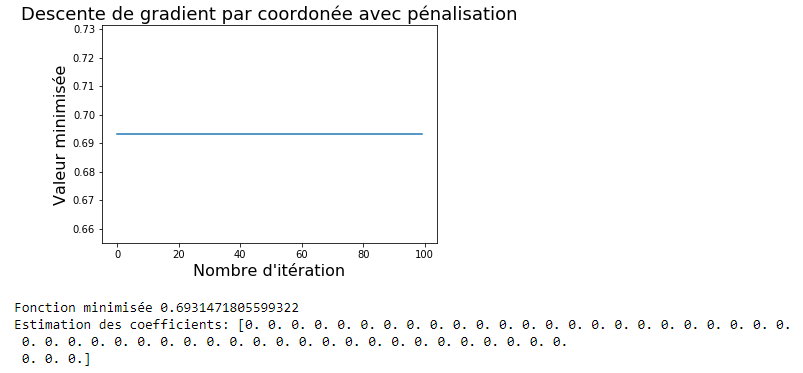

Pour $\lambda = 0.05$:

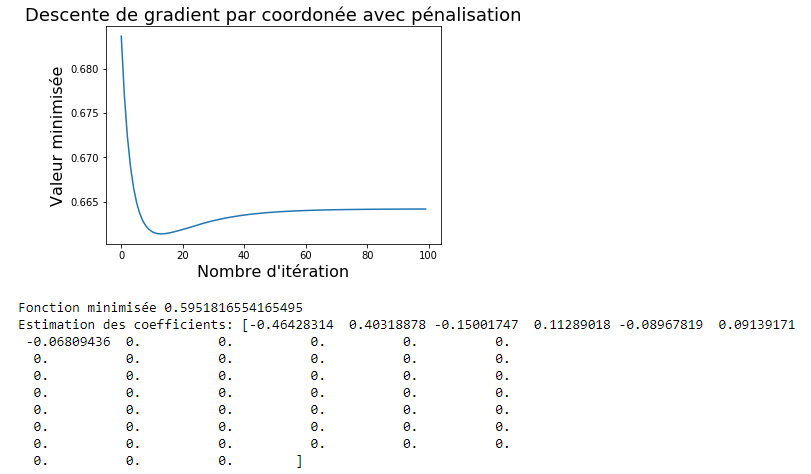

Pour $\lambda = 0.01$

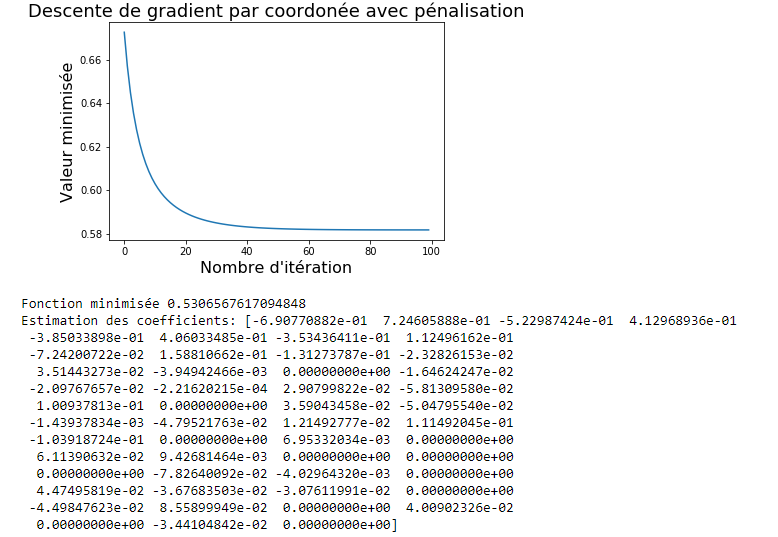

On remarque que plus le $\lambda$ est petit, plus on a des estimation de coefficients non nuls, mais néanmoins plus précis. Il faut faire un choix entre la précision et le nombre de variables qu'on garde.